In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
crime = pd.read_csv('denver_crime.csv')

In [4]:
crime.columns

Index(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC'],
      dtype='object')

In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454540 entries, 0 to 454539
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   INCIDENT_ID             454540 non-null  int64  
 1   OFFENSE_ID              454540 non-null  int64  
 2   OFFENSE_CODE            454540 non-null  int64  
 3   OFFENSE_CODE_EXTENSION  454540 non-null  int64  
 4   OFFENSE_TYPE_ID         454540 non-null  object 
 5   OFFENSE_CATEGORY_ID     454540 non-null  object 
 6   FIRST_OCCURRENCE_DATE   454540 non-null  object 
 7   LAST_OCCURRENCE_DATE    152118 non-null  object 
 8   REPORTED_DATE           454540 non-null  object 
 9   INCIDENT_ADDRESS        414371 non-null  object 
 10  GEO_X                   450607 non-null  float64
 11  GEO_Y                   450607 non-null  float64
 12  GEO_LON                 450606 non-null  float64
 13  GEO_LAT                 450606 non-null  float64
 14  DISTRICT_ID         

In [6]:
crime.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2018869789,2018869789239900,2399,0,theft-other,larceny,12/27/2018 3:58:00 PM,NaN,12/27/2018 4:51:00 PM,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5.0,512.0,stapleton,1,0
1,202111218,202111218570700,5707,0,criminal-trespassing,all-other-crimes,1/6/2021 9:20:00 PM,NaN,1/7/2021 12:23:00 AM,1701 WYNKOOP ST,3140598.0,1699567.0,-104.999951,39.753054,6.0,612.0,union-station,1,0
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,6/8/2017 1:15:00 PM,6/8/2017 5:15:00 PM,6/12/2017 8:44:00 AM,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6.0,612.0,union-station,1,0
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,12/7/2019 1:07:00 PM,12/7/2019 6:30:00 PM,12/9/2019 1:35:00 PM,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1.0,122.0,west-colfax,1,0
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 8:15:00 PM,12/22/2018 8:31:00 PM,12/22/2018 10:00:00 PM,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5.0,521.0,montbello,1,0


In [7]:
cols = ['FIRST_OCCURRENCE_DATE', 'LAST_OCCURRENCE_DATE', 'REPORTED_DATE']
for col in cols:
    crime[col] = pd.to_datetime(crime[col])

In [15]:
crime['year']=crime.FIRST_OCCURRENCE_DATE.dt.year
crime['month']=crime.FIRST_OCCURRENCE_DATE.dt.month
crime.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,year,month
0,2018869789,2018869789239900,2399,0,theft-other,larceny,2018-12-27 15:58:00,NaT,2018-12-27 16:51:00,2681 N HANOVER CT,...,1700715.0,-104.866156,39.755561,5.0,512.0,stapleton,1,0,2018,12
1,202111218,202111218570700,5707,0,criminal-trespassing,all-other-crimes,2021-01-06 21:20:00,NaT,2021-01-07 00:23:00,1701 WYNKOOP ST,...,1699567.0,-104.999951,39.753054,6.0,612.0,union-station,1,0,2021,1
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,2017-06-08 13:15:00,2017-06-08 17:15:00,2017-06-12 08:44:00,1705 17TH ST,...,1699792.0,-104.999264,39.753669,6.0,612.0,union-station,1,0,2017,6
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,2019-12-07 13:07:00,2019-12-07 18:30:00,2019-12-09 13:35:00,1350 N IRVING ST,...,1694088.0,-105.029208,39.738134,1.0,122.0,west-colfax,1,0,2019,12
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,2018-12-22 20:15:00,2018-12-22 20:31:00,2018-12-22 22:00:00,13625 E RANDOLPH PL,...,1716158.0,-104.828868,39.797750,5.0,521.0,montbello,1,0,2018,12


In [9]:
cat_by_year = crime.groupby(['year', 'OFFENSE_CATEGORY_ID']).agg({'INCIDENT_ID':'count'}).reset_index()
cat_by_year

,year,OFFENSE_CATEGORY_ID,INCIDENT_ID
0,2016,aggravated-assault,2139
1,2016,all-other-crimes,16413
2,2016,arson,95
3,2016,auto-theft,4822
4,2016,burglary,4669
...,...,...,...
85,2021,robbery,37
86,2021,sexual-assault,17
87,2021,theft-from-motor-vehicle,438
88,2021,traffic-accident,528


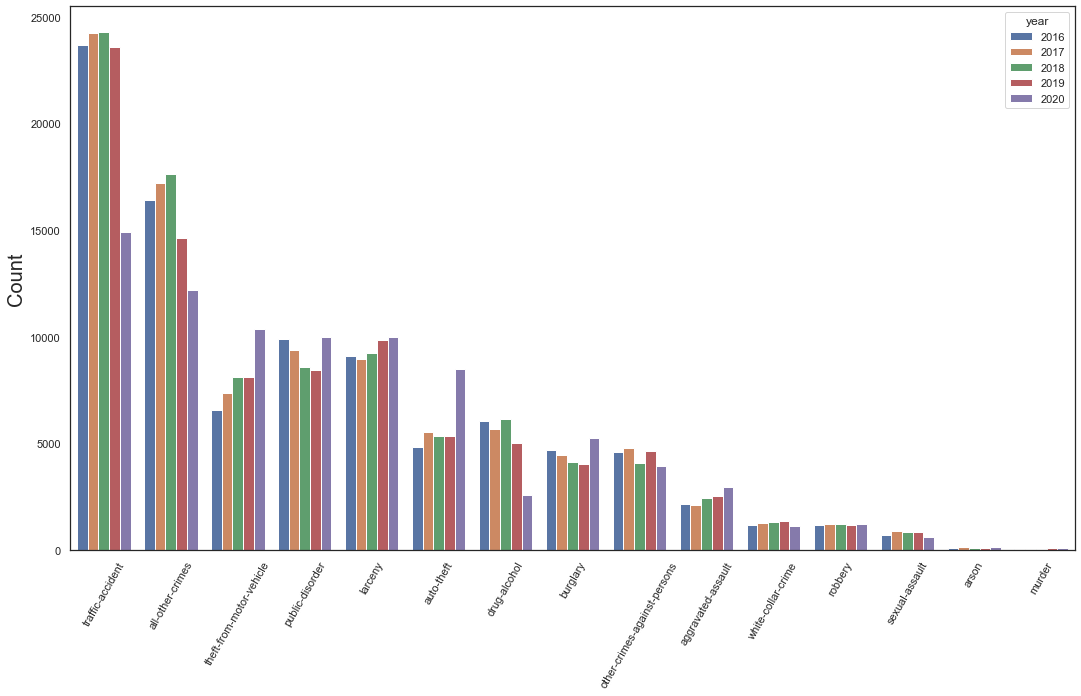

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":30,"axes.titlesize":20,"axes.labelsize":20},style="white")
fig, ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(x='OFFENSE_CATEGORY_ID', y='INCIDENT_ID', hue='year', data=cat_by_year[cat_by_year.year!=2021].sort_values('INCIDENT_ID', ascending=False))
plt.ylabel('Count')
plt.xlabel('')
_ = plt.xticks(rotation = 60)

Text(0.5, 0, 'Month')

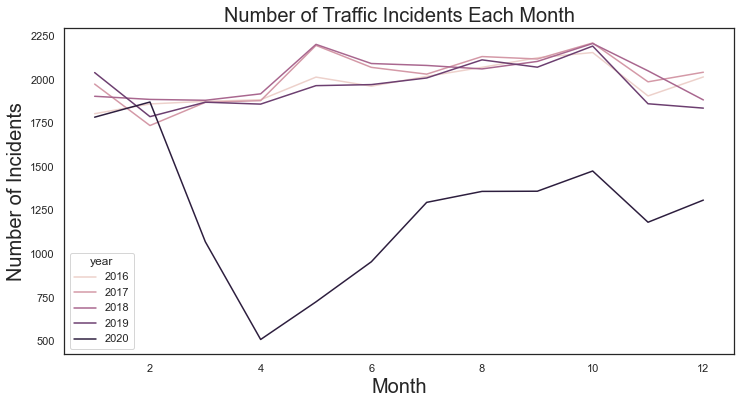

In [11]:
traffic_df = crime[crime.OFFENSE_CATEGORY_ID == 'traffic-accident'].copy()
traffic_df['month']=traffic_df.FIRST_OCCURRENCE_DATE.dt.month
traffic_df.head()
traffic_df = traffic_df.groupby(['year', 'month']).agg({'INCIDENT_ID': 'count'}).reset_index()
traffic_df.head()
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.lineplot(x='month',y='INCIDENT_ID', hue='year', data=traffic_df[traffic_df['year']!=2021])
plt.ylabel('Number of Incidents')
plt.title('Number of Traffic Incidents Each Month')
plt.xlabel('Month')

# First try at not using seaborn

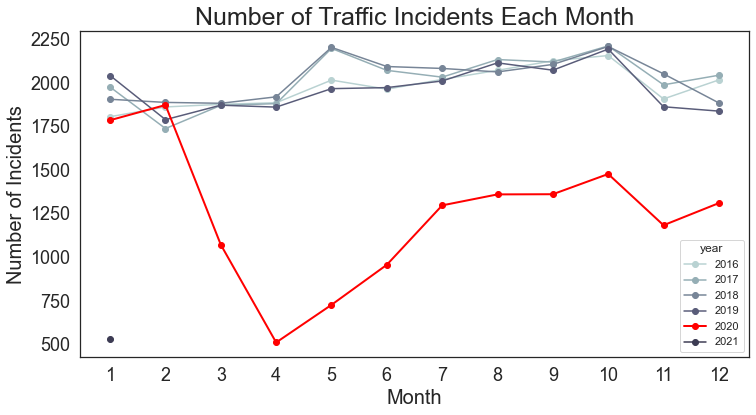

In [12]:
traffic_df = crime[crime.OFFENSE_CATEGORY_ID == 'traffic-accident'].copy()
traffic_df['month']=traffic_df.FIRST_OCCURRENCE_DATE.dt.month
traffic_df = traffic_df.groupby(['year', 'month']).agg({'INCIDENT_ID': 'count'}).rename(columns={'INCIDENT_ID':'count'}).reset_index()
fig, ax = plt.subplots(figsize=(12,6))

n =  max(traffic_df.year) - min(traffic_df.year) + 2
ax.set_prop_cycle('color',[plt.cm.bone(i) for i in np.linspace(0, 0.8, n)][::-1])

for year in range(min(traffic_df.year), max(traffic_df.year)+1):  
    tmp = traffic_df[traffic_df.year==year]
    if year != 2020:
        ax.plot(tmp.month, tmp['count'], 'o-', label=f'{year}')
    if year == 2020:
        ax.plot(tmp.month, tmp['count'], 'o-', color='red', label=f'{year}',lw=2)
ax.set_title('Number of Traffic Incidents Each Month', fontsize=25)
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Number of Incidents', fontsize=20)
ax.set_xticks(range(1,13))
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.legend(title='year')

# Trying to graph all categories over time

In [28]:
# def capitalize_titles(string):
#     return ' '.join([x.capitalize() for x in string.split('-')])

# def plot_specific_category_over_time(ax, data, specific_category, OFFENSE_CATEGORY_ID, FIRST_OCCURRENCE_DATE):
#     cat_df = crime[crime.OFFENSE_CATEGORY_ID == specific_category].copy()
#     cat_df['month']=cat_df.FIRST_OCCURRENCE_DATE.dt.month
#     cat_df = cat_df.groupby(['year', 'month']).agg({'INCIDENT_ID': 'count'}).rename(columns={'INCIDENT_ID':'count'}).reset_index()
    
#     n =  max(cat_df.year) - min(cat_df.year) + 1
#     ax.set_prop_cycle('color',[plt.cm.bone(i) for i in np.linspace(0, 0.8, n)][::-1])
    
#     for year in range(min(cat_df.year), max(cat_df.year)+1):  
#         tmp = cat_df[cat_df.year==year]
#         if year != 2020:
#             ax.plot(tmp.month, tmp['count'], 'o-', label=f'{year}')
#         if year == 2020:
#             ax.plot(tmp.month, tmp['count'], 'o-', color='red', label=f'{year}',lw=2)
#     ax.set_title(f'Number of {capitalize_titles(specific_category)} Incidents By Month', fontsize=25)
#     ax.set_xlabel('Month', fontsize=20)
#     ax.set_ylabel('Number of Incidents', fontsize=20)
#     ax.set_xticks(range(1,13))
#     ax.xaxis.set_tick_params(labelsize=18)
#     ax.yaxis.set_tick_params(labelsize=18)
#     ax.legend(title='year')

# categories = crime.OFFENSE_CATEGORY_ID.unique()
# num_rows = int(np.ceil(len(categories)/2))
# fig, axes = plt.subplots(num_rows, 2, figsize=(24, num_rows*6))
# for category, ax in zip(categories, axes.flatten()):
#     plot_specific_category_over_time(ax, crime, category, 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE')
# if len(categories) != num_rows * 2:
#     axes.flatten()[-1].axis('off')
# plt.tight_layout()

# Try to generalize so you can call later...

In [32]:
def capitalize_titles(string):
    return ' '.join([x.capitalize() for x in string.split('-')])

def plot_specific_category_over_time(ax, df, specific_category, OFFENSE_CATEGORY_ID, FIRST_OCCURRENCE_DATE, INCIDENT_ID):
    cat_df = df[df.OFFENSE_CATEGORY_ID == specific_category].copy()
    cat_df['month']=cat_df.FIRST_OCCURRENCE_DATE.dt.month
    cat_df['year']=cat_df.FIRST_OCCURRENCE_DATE.dt.year
    cat_df = cat_df.groupby(['year', 'month']).agg({INCIDENT_ID: 'count'}).rename(columns={INCIDENT_ID:'incident_count'}).reset_index()
    
    n =  max(cat_df.year) - min(cat_df.year) + 1
    ax.set_prop_cycle('color',[plt.cm.bone(i) for i in np.linspace(0, 0.8, n)][::-1])
    
    for year in range(min(cat_df.year), max(cat_df.year)+1):  
        tmp = cat_df[cat_df.year==year]
        if year != 2020:
            ax.plot(tmp.month, tmp.incident_count, 'o-', label=f'{year}')
        if year == 2020:
            ax.plot(tmp.month, tmp.incident_count, 'o-', color='red', label=f'{year}',lw=2)
    ax.set_title(f'Number of {capitalize_titles(specific_category)} Incidents By Month', fontsize=25)
    ax.set_xlabel('Month', fontsize=20)
    ax.set_ylabel('Number of Incidents', fontsize=20)
    ax.set_xticks(range(1,13))
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18)
    ax.legend(title='year')

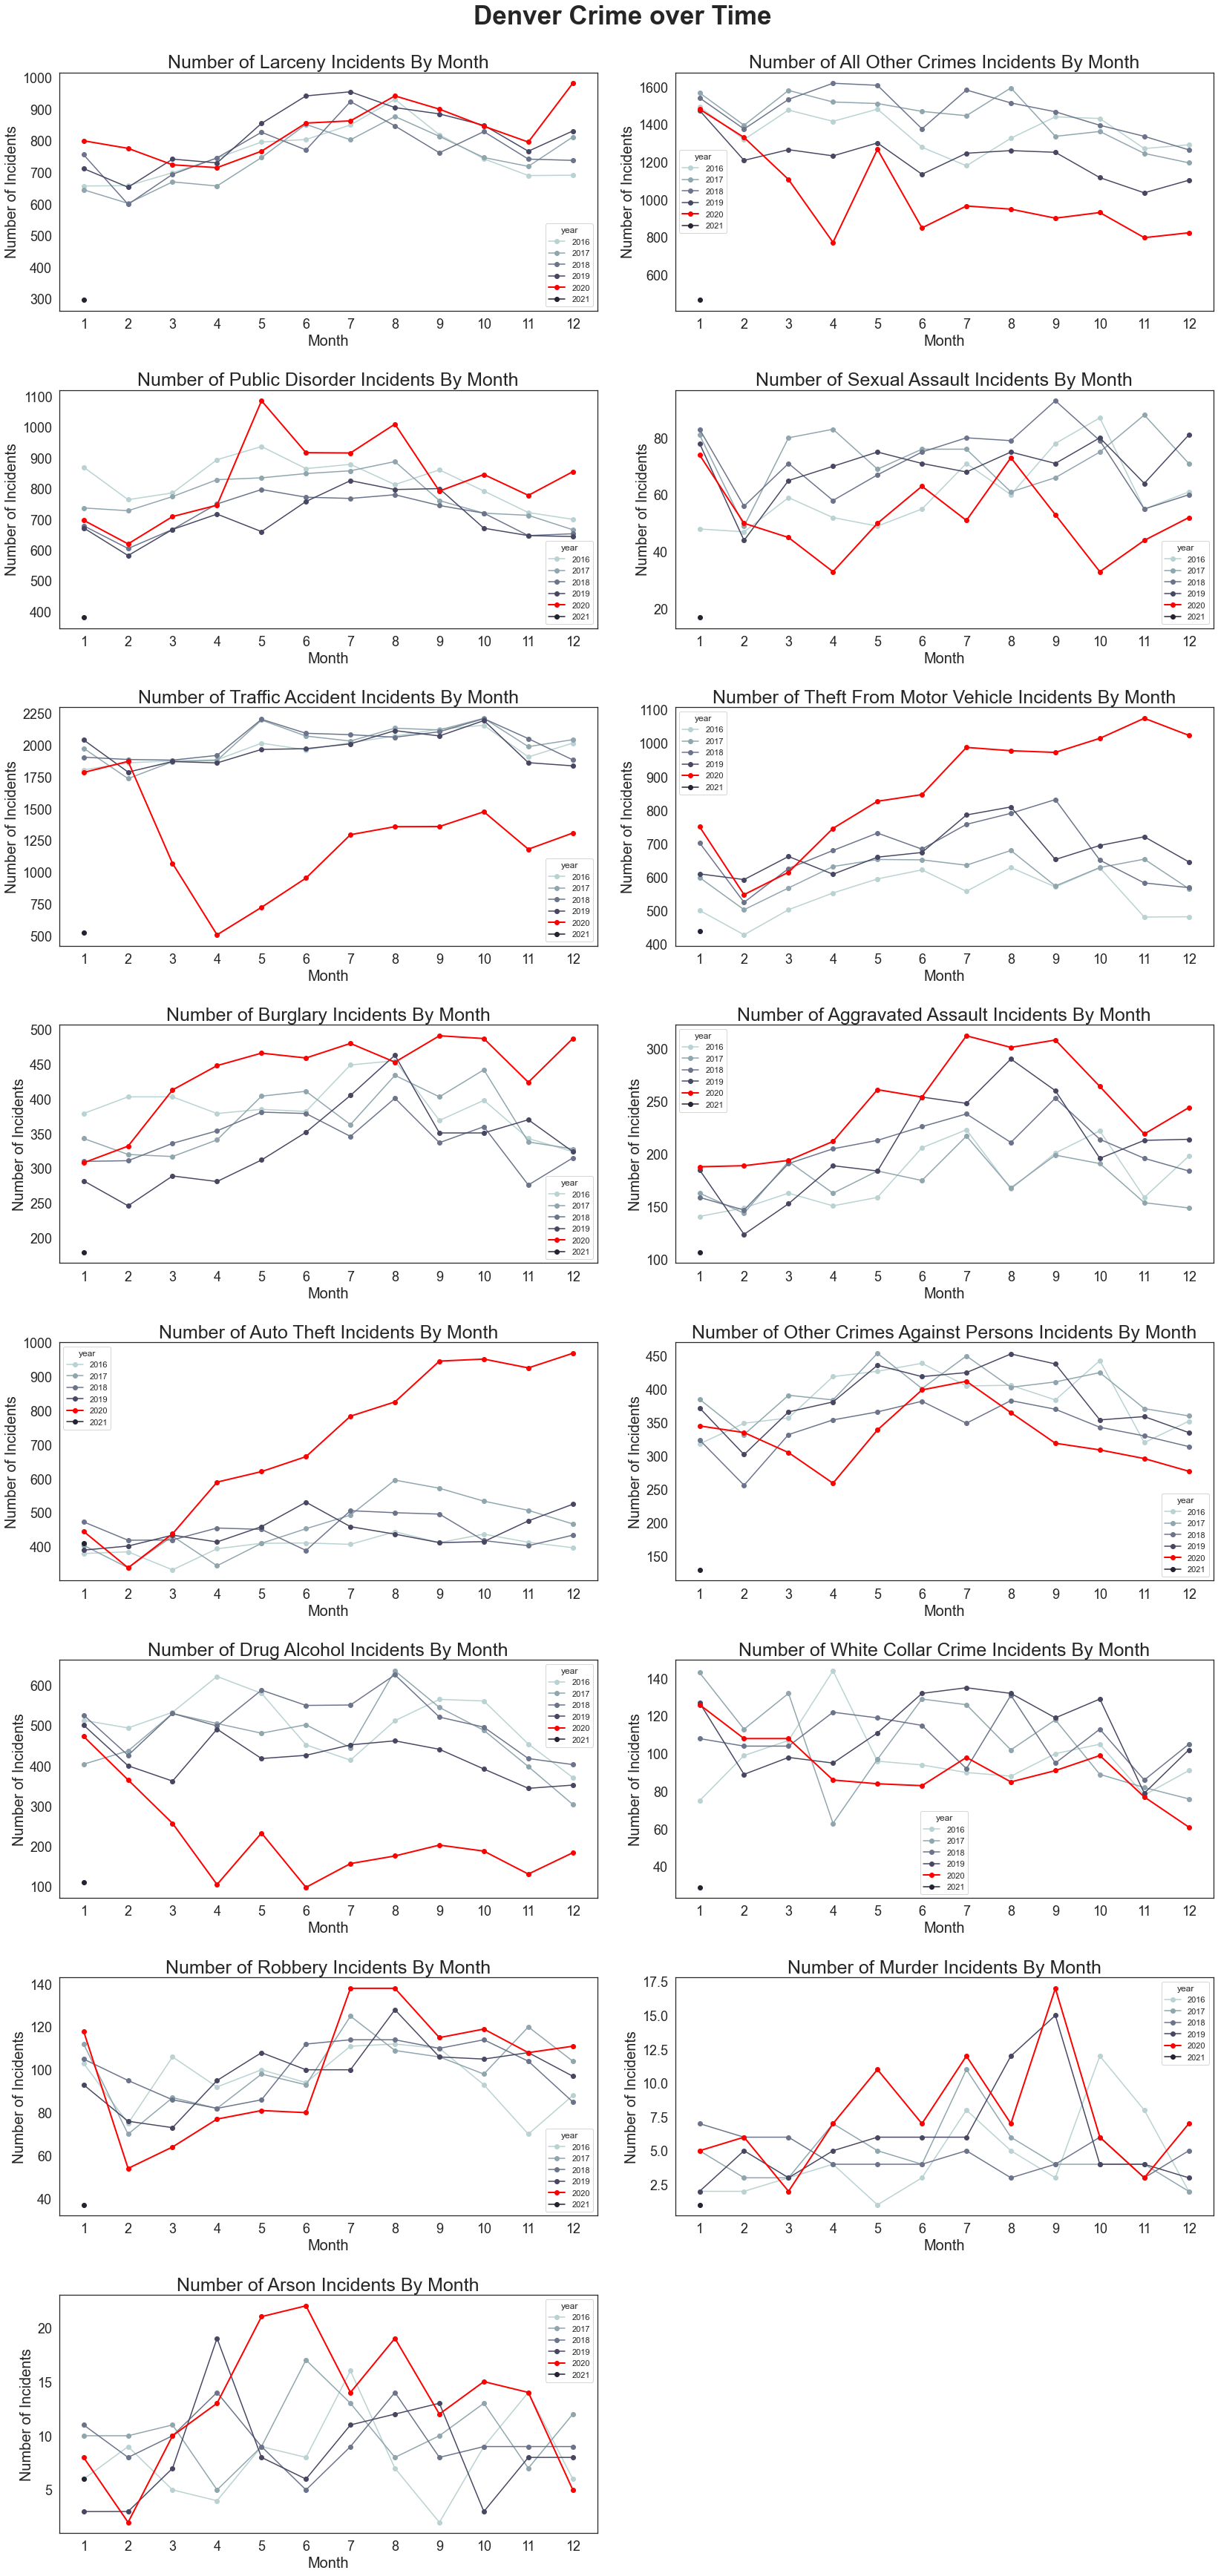

In [35]:
def plot_all_cats_over_time(df, OFFENSE_CATEGORY_ID, FIRST_OCCURRENCE_DATE, INCIDENT_ID, city):
    categories = df.OFFENSE_CATEGORY_ID.unique()
    num_rows = int(np.ceil(len(categories)/2))
    fig, axes = plt.subplots(num_rows, 2, figsize=(24, num_rows*6))
    for category, ax in zip(categories, axes.flatten()):
        plot_specific_category_over_time(ax, df, category, OFFENSE_CATEGORY_ID, FIRST_OCCURRENCE_DATE, INCIDENT_ID)
    if len(categories) != num_rows * 2:
        axes.flatten()[-1].axis('off')
    fig.suptitle(f'{city} Crime over Time', x=0.5, y=1.01, fontsize=35, fontweight='bold')
    plt.tight_layout()
    fig.savefig(f'{city}_Crime_over_Time.png')
    
plot_all_cats_over_time(crime,'OFFENSE_CATEGORY_ID','FIRST_OCCURRENCE_DATE', 'INCIDENT_ID', 'Denver')

In [38]:
crime.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,year,month
0,2018869789,2018869789239900,2399,0,theft-other,larceny,2018-12-27 15:58:00,NaT,2018-12-27 16:51:00,2681 N HANOVER CT,...,1700715.0,-104.866156,39.755561,5.0,512.0,stapleton,1,0,2018,12
1,202111218,202111218570700,5707,0,criminal-trespassing,all-other-crimes,2021-01-06 21:20:00,NaT,2021-01-07 00:23:00,1701 WYNKOOP ST,...,1699567.0,-104.999951,39.753054,6.0,612.0,union-station,1,0,2021,1
2,20176005213,20176005213239901,2399,1,theft-bicycle,larceny,2017-06-08 13:15:00,2017-06-08 17:15:00,2017-06-12 08:44:00,1705 17TH ST,...,1699792.0,-104.999264,39.753669,6.0,612.0,union-station,1,0,2017,6
3,20196012240,20196012240230800,2308,0,theft-from-bldg,larceny,2019-12-07 13:07:00,2019-12-07 18:30:00,2019-12-09 13:35:00,1350 N IRVING ST,...,1694088.0,-105.029208,39.738134,1.0,122.0,west-colfax,1,0,2019,12
4,2018861883,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,2018-12-22 20:15:00,2018-12-22 20:31:00,2018-12-22 22:00:00,13625 E RANDOLPH PL,...,1716158.0,-104.828868,39.797750,5.0,521.0,montbello,1,0,2018,12


In [75]:
traffic_temp = crime[crime['OFFENSE_TYPE_ID']=='traffic-accident'].groupby(['year', 'month']).agg({'INCIDENT_ID':'count'}).rename(columns={'INCIDENT_ID': 'num_of_incidents'}).reset_index()
traffic_temp = traffic_temp[traffic_temp.year!=2021]
traffic_temp.head()


,year,month,num_of_incidents
0,2016,1,1227
1,2016,2,1331
2,2016,3,1309
3,2016,4,1315
4,2016,5,1400


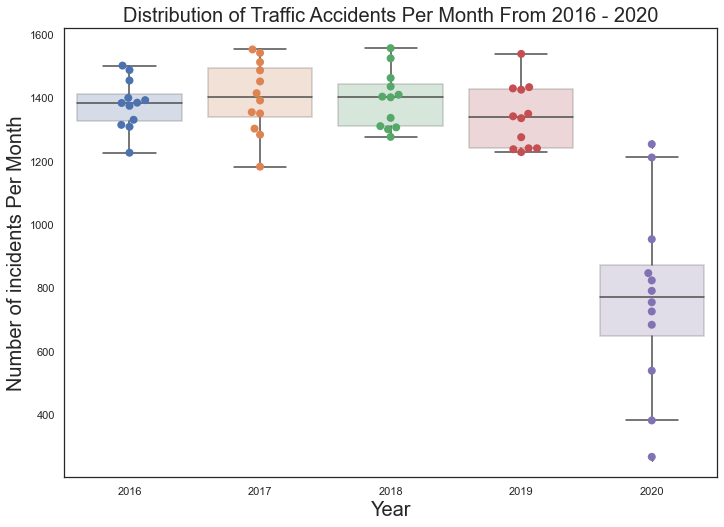

In [84]:
traffic_temp = crime[crime['OFFENSE_TYPE_ID']=='traffic-accident'].groupby(['year', 'month']).agg({'INCIDENT_ID':'count'}).rename(columns={'INCIDENT_ID': 'num_of_incidents'}).reset_index()
traffic_temp = traffic_temp[traffic_temp.year!=2021]
g = sns.boxplot(x='year', y='num_of_incidents', data=traffic_temp, boxprops=dict(alpha=0.25))
g = sns.swarmplot(x='year', y='num_of_incidents', data=traffic_temp, size=8)
g.set(xlabel='Year',ylabel='Number of incidents Per Month')
_ = g.set_title('Distribution of Traffic Accidents Per Month From 2016 - 2020')


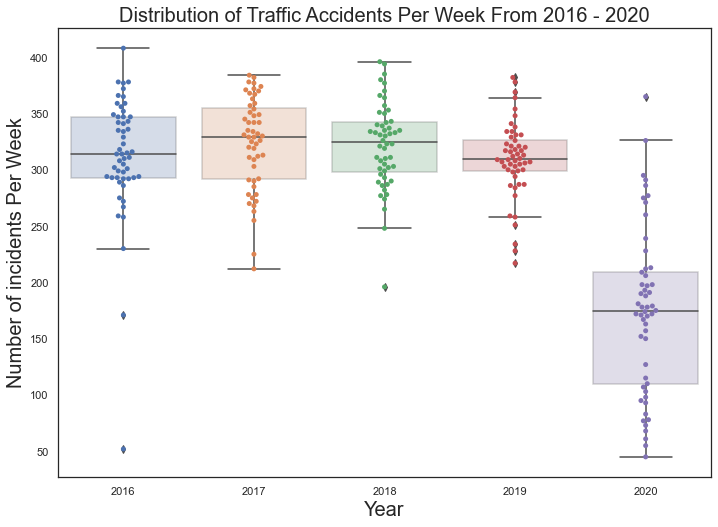

In [87]:
crime['week'] = crime['FIRST_OCCURRENCE_DATE'].dt.week
traffic_temp = crime[crime['OFFENSE_TYPE_ID']=='traffic-accident'].groupby(['year', 'week']).agg({'INCIDENT_ID':'count'}).rename(columns={'INCIDENT_ID': 'num_of_incidents'}).reset_index()
traffic_temp = traffic_temp[traffic_temp.year!=2021]
g = sns.boxplot(x='year', y='num_of_incidents', data=traffic_temp, boxprops=dict(alpha=0.25))
g = sns.swarmplot(x='year', y='num_of_incidents', data=traffic_temp, size=5)
g.set(xlabel='Year',ylabel='Number of incidents Per Week')
_ = g.set_title('Distribution of Traffic Accidents Per Week From 2016 - 2020')

In [88]:
traffic_temp.head()

,year,week,num_of_incidents
0,2016,1,356
1,2016,2,267
2,2016,3,259
3,2016,4,293
4,2016,5,378


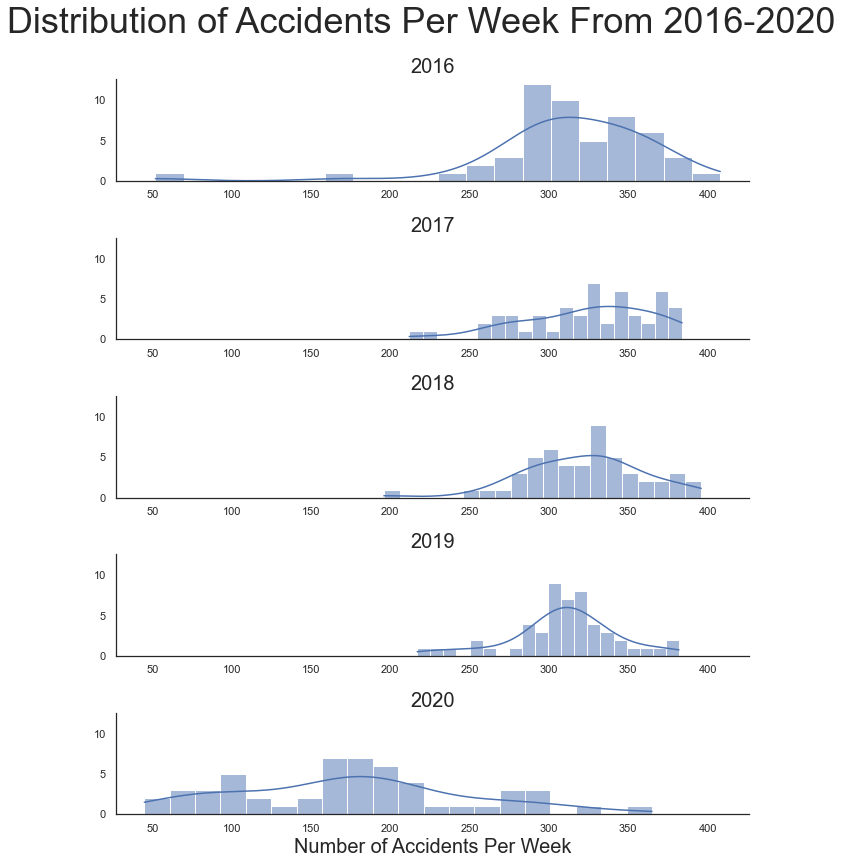

In [203]:
g = sns.FacetGrid(traffic_temp, row = "year", height=2.5, aspect=4)
g.map(sns.histplot, 'num_of_incidents', bins=20, kde=True)

g.axes.flatten()[-1].set_xlabel('Number of Accidents Per Week')
g.set_titles(row_template = '{row_name}')
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
    
g.fig.subplots_adjust(top=0.9) 
_ = g.fig.suptitle('Distribution of Accidents Per Week From 2016-2020')



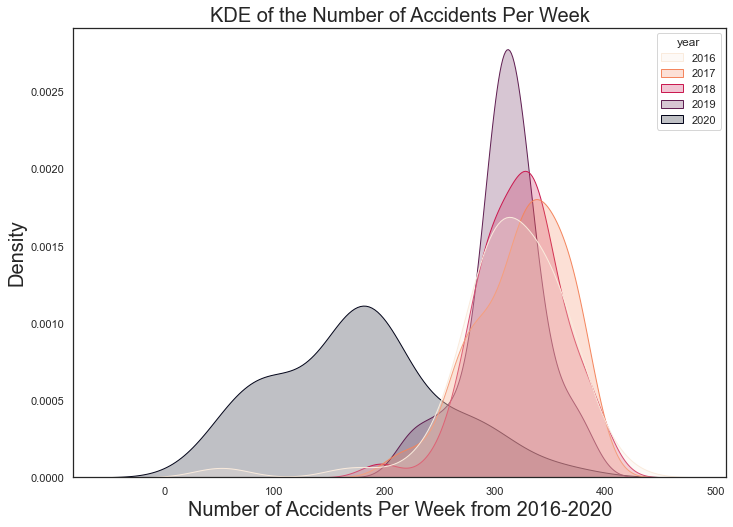

In [207]:
c = sns.color_palette("rocket_r", as_cmap=True)
g = sns.kdeplot(data=traffic_temp, x='num_of_incidents', hue='year', fill=True, palette=c)
g.set_title('KDE of the Number of Accidents Per Week')
_ = g.set_xlabel('Number of Accidents Per Week from 2016-2020')